In [25]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans2 import KMeansAlgorithm

In [26]:
"""
Load csv into pandas dataframe
"""

flname="../dataset_cluster_warehouse_exp_2.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,subdistrict_name,lat_long,avg_demand_baseline,demand_target
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,"-6.13727,106.7153587",57,85.5
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,"-6.1385859,106.7293052",33,49.5
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,"-6.1715044,106.7056503",25,37.5
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,"-6.1613339,106.7294525",40,60.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,"-6.159495,106.7897422",153,229.5
...,...,...,...,...,...,...,...
185,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,"-6.1852948,106.8073138",45,67.5
186,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,"-6.2076699,106.8075363",240,360.0
187,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,"-6.1906249,106.8072637",99,148.5
188,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,"-6.1968299,106.8074788",37,55.5


In [27]:
"""
split data lat_long into each lat and long it self.
"""

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name','subdistrict_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,33,49.5,-6.138586,106.729305
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,25,37.5,-6.171504,106.705650
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,40,60.0,-6.161334,106.729452
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,153,229.5,-6.159495,106.789742
...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,45,67.5,-6.185295,106.807314
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,240,360.0,-6.207670,106.807536
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,99,148.5,-6.190625,106.807264
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,37,55.5,-6.196830,106.807479


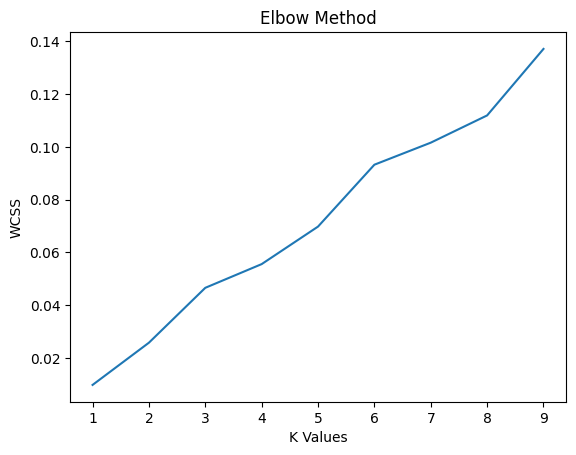

In [28]:
"""
Elbow method to determine number of cluster
"""
train_dataset = dataset[['lat', 'long']]
crange = 10
kmeans = KMeansAlgorithm(train_dataset, crange)
kmeans.fit_model(300)
kmeans.plot_elbow()

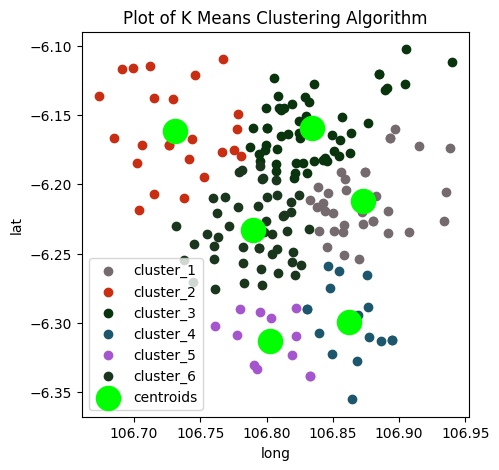

In [29]:
"""
K means clustering
"""
km = KMeansAlgorithm(train_dataset, 6)
km.fit_model(200)
km.plot_kmeans()

In [30]:
"""
Centroid and parsing format of centroid into more readable format
"""

centroid = []
for i in range(len(km.centroids[0])):
    centroid.append([km.centroids[0][i], km.centroids[1][i]])
centroid

[[-6.212059408333333, 106.87287393611112],
 [-6.161403464000001, 106.731243808],
 [-6.159286826415094, 106.8341908037736],
 [-6.299333805882352, 106.86256248235293],
 [-6.31284395, 106.80248612500002],
 [-6.233120244680851, 106.78996498297874]]

In [31]:
"""
show dataset again with its class predicition
"""

y_km = km.predict()
#assign y pred to dataset
pred_result = [0 for i in range(dataset.shape[0])]
for prediction in y_km[0].keys():
    for d in y_km[0][prediction]:
        idx = dataset[(dataset["lat"]==d[0]) & (dataset["long"]==d[1])].index.tolist()
        for id in idx:
            pred_result[id] = prediction
dataset = dataset.assign(pred=pred_result)
dataset.sort_values("pred")

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long,pred
94,KOTA ADMINISTRASI JAKARTA SELATAN,TEBET,TEBET BARAT,68,102.0,-6.233777,106.839921,1
113,KOTA ADMINISTRASI JAKARTA TIMUR,JATINEGARA,CIPINANG BESAR UTARA,43,77.4,-6.220207,106.871844,1
112,KOTA ADMINISTRASI JAKARTA TIMUR,JATINEGARA,CIPINANG BESAR SELATAN,84,151.2,-6.228735,106.872729,1
111,KOTA ADMINISTRASI JAKARTA TIMUR,JATINEGARA,BIDARA CINA,54,97.2,-6.234489,106.857681,1
110,KOTA ADMINISTRASI JAKARTA TIMUR,DUREN SAWIT,PONDOK KOPI,120,216.0,-6.226110,106.934033,1
...,...,...,...,...,...,...,...,...
80,KOTA ADMINISTRASI JAKARTA SELATAN,PESANGGRAHAN,PETUKANGAN SELATAN,65,97.5,-6.243002,106.744922,6
79,KOTA ADMINISTRASI JAKARTA SELATAN,PESANGGRAHAN,PESANGGRAHAN,101,151.5,-6.254297,106.737635,6
78,KOTA ADMINISTRASI JAKARTA SELATAN,PESANGGRAHAN,BINTARO,122,183.0,-6.270389,106.744128,6
86,KOTA ADMINISTRASI JAKARTA SELATAN,SETIABUDI,KARET KUNINGAN TIMUR,91,136.5,-6.212920,106.818531,6


In [32]:
#Count for silhoutte score
#Silhoutte Score


s_score = silhouette_score(train_dataset, km.labels_, metric='euclidean')
print("sihoute score is ", s_score)

AttributeError: 'KMeansAlgorithm' object has no attribute 'labels_'